# Implementing Statistics with Functions - Lab

## Introduction 
In this lab you'll dive deep into calculating the measures of central tendency and dispersion introduced in previous lessons. You will code the formulas for these functions in Python which will require you to use the programming skills that you have gained. Let's get started!

**Don't worry if you find this lab hard. code fluency requires a lot of practice, and you'll get the opportunity to do that later on. This lab is here to provide an additional opportunity to practice, but don't worry if you can't complete all the exercises.**

## Objectives

You will be able to:

* Calculate the measures of dispersion for a dataset
* Compare the different measures of dispersion
* Calculate the measures of central tendency for a dataset
* Compare the different measures of central tendency

## Dataset

For this lab, we'll use the [NHIS dataset](http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv), which contains weights, heights, and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the `pandas` library to import the data into our Python environment. Don't worry about how `pandas` works for now, just run the code in the next cell. Your data will be saved in `df`, next we select the `heights` column and store it in a list. This `height` list is the only part of the data that will be used in this lesson.

Run the cell below to import the data. 

In [1]:
import pandas as pd
df = pd.read_csv('nhis.csv')
height = list(df['height'])

As you can see, we saved the heights as a list in the variable `height` in the cell above. 

In the cell below:

* Print out the number of items in `height`
* Slice and print out the first 10 items from `height`

In [2]:
print (len(height)) # Expected Output: 4785
print (height[:10]) # Expected Output: [74, 70, 61, 68, 66, 98, 99, 70, 65, 64]

4785
[74, 70, 61, 68, 66, 98, 99, 70, 65, 64]


So, around 4700 records of height. That's a lot of data. Next, we'll try plotting some basic **_Histograms_** for these records. 

## Plotting Histograms

We'll begin by importing the `pyplot` module from the library `matplotlib` and setting an alias of `plt` for it (so that we only have to type `plt.` instead of `matplotlib.pyplot.` each time we want to use it).  Note that `plt` is considered the **_Standard Alias_** for matplotlib.

Run the cell below to import matplotlib and use it to create a histogram of our `height` data with 8 different bins. 

In [3]:
# Import matplotlib and plot histogram forheight data
import matplotlib.pyplot as plt
%matplotlib inline

Next, use matplotlib to create a histogram by passing in our data, as well as the parameter `bins=8`.

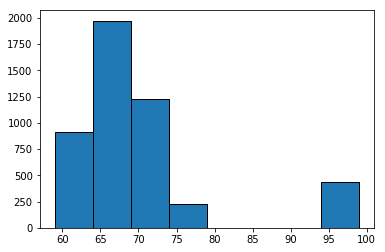

In [4]:
plt.hist(height, bins=8, edgecolor = "black")
plt.show()

Do you spot anything unusual above? Some outliers, maybe?

## Measures of Central Tendency: Calculating the Mean

We're just beginning to dig into the data stored in `height`. We'll begin by writing a function to calculate the mean of the data.  Recall the formula for calculating mean:

$$ \Large \bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i $$

Using the Python skills you have learned so far, create a function `get_mean()` to perform the following tasks: 
* Input a list of numbers (like the height list we have above)
* Calculate the sum of numbers and length of the list 
* Calculate mean from above, round off to 2 decimals and return it.

You have actually created a function for this before - but some extra practice - now that you formally know the formula of the mean - is always valuable!

In [5]:
def get_mean(data):

    count = 0
    for i in data:
        count += i
    mean = round(count / len(data), 2)
    
    return mean

test1 = [5, 4, 1, 3, 2]
test2 = [4, 2, 3, 1]

print(get_mean(test1)) # 3
print(get_mean(test2)) # 2.5

3.0
2.5


Now, we'll test the function by passing in the height list.

In [6]:
# After creating the function, pass the height list to the function 
mean = get_mean(height)

print("Sample Mean:", mean)

# Sample Mean: 69.58

Sample Mean: 69.58


So, we have our mean length, 69.58, and this confirms our observations from the histogram. But we also have some outliers in our data above and we know outliers affect the mean calculation by pulling the mean value in their direction. So, let's remove these outliers and create a new list to see if our mean shifts or stays. We'll use a threshold of 80 inches, i.e. filter out any values greater than 80. 
 
Perform following tasks:

* Create a function `filter_list()` that inputs a list 
* Perform a for loop to iteratively check and append values to a new list if the value is less than 80
* Return the new list 

**Hint**: Use a conditional 
```python
if condition
   append number to list
```

In [7]:
def filter_list(listA):
    listB = []
    for l in listA:
        if l < 80:
            listB.append(l)
    return listB

test = [60, 70,80, 90]
filter_list(test) # [60, 70]

[60, 70]

Great, now we can use `filter_list()` to filter our `height` list and plot a new histogram to see if things change considerably.  

In [8]:
# Filter the height list using above function
filtered_height = filter_list(height)

Now that we have filtered the outliers out of our data, let's recreate our histogram with 8 bins using our filtered data. 

**_NOTE_**: You do not need to reimport matplotlib -- once it's been imported, it's stored in memory and can be accessed whenever we like in other cells. 

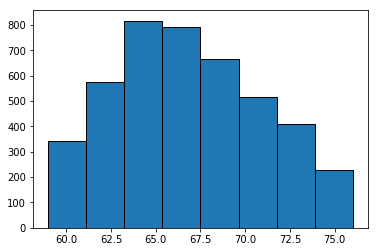

In [9]:
# Plot a histogram for the new list - use 8 bins as before
plt.hist(filtered_height, bins = 8, edgecolor = "black")
plt.show()

Since we've filtered our data to remove outliers, we should also recalculate the mean.  Do this now in the cell below. 

In [10]:
# Get the mean of the new filtered_height list using our get_mean() function
get_mean(filtered_height)
# 66.85

66.85

Does the mean height of our filtered data match up with what we see in our histogram of our filtered data?

Note that in some analytical situations we may not be able to exclude the outliers in such a naive manner. 
You'd probably want to go ahead and look at other measures of central tendency like the median and mode.

For now, let's skip that, and let's try to get a clearer picture by looking at how much the values deviate from the mean. We have seen variance and standard deviation before as measures of such dispersion. Let's have a go at these to strengthen our understanding of this data. 


## Calculating the Variance

The formula for variance is: 

$$ \large s^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2 $$

In the cell below, write a function that takes a list of numbers as input and returns the variance (rounded to two decimal places) of the sample as output.

In [11]:
def get_variance(sample):

    # First, calculate the mean
    n = len(sample)
    total = sum(sample)
    sample_mean = total/n
    
    # Now, subtract the mean from each point and square the result 
    # Make sure to use a for loop and += to sum them together 

    val_minus_mu_accumulator = 0
    for i in sample:
        val_minus_mu_accumulator += (i - sample_mean)**2
    
    # Divide the total by the number of items in the sample to calculate variance 
    variance = val_minus_mu_accumulator / (n)
    
    return round(variance, 2)

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]
print(get_variance(test1)) # 2.22
print(get_mean(test1))  # 3.33
print(get_variance(test2)) # 2.89

2.22
3.33
2.89


Now we can test the variance of our list `height` with our new `get_variance()` function. 

In [12]:

# Calculate the variance of our original height list
get_variance(height)

87.73

So this value, as we learned earlier, tells us a bit about the deviation but not in the units of underlying data. This is because it squares the values of deviations. Standard deviation, however, can deal with this issue as it takes the square roots of differences. So that would probably be a bit more revealing. 

## Calculating the Standard Deviation

In the cell below, write a function that takes a list of numbers as input and returns the standard deviation of that sample as output.

Recall that the formula for Standard Deviation is:

$$ \large s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2} $$

You would need the `sqrt()` function from `math` library to calculate the square root.

**Note:** *Alternatively, another approach to finding the square root of a number would be to raise that number to the power of `0.5`. For example, if we wanted to find the square root of `100`, we could raise `100` to the power of `0.5`, which would give us the number `10.0`. However, **either** approach will work.*

```python
100**0.5
# 10.0

from math import sqrt
sqrt(100)
# 10.0
```

In [13]:
from math import sqrt

def get_stddev(list):
    
    stddev = sqrt(get_variance(list))
    
    return round(stddev, 2) 

test = [120,112,131,211,312,90]

print (get_stddev(test))

76.71


So now we can finally calculate the standard deviation for our `height` list and inspect the results. 

In [14]:

# Calculate the standard deviation of our original height list
get_stddev(height)

9.37

So 9.37 inches is the amount of deviation present in our dataset. As we are still including outlier values, this might be slightly affected but these results are now much more reliable. 


## Summary 

In this lab, we performed a basic, yet detailed, statistical analysis around measuring the tendencies of center and spread for a given dataset. We looked at building a number of functions to calculate different measures and also used some statistical visualizations to strengthen our intuitions around the dataset. We shall see how we can simplify this process as we study `numpy` and `pandas` libraries to ease out the programming load while calculating basic statistics. 